# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.001731e+01     7.107622e+00
 * time: 0.0014650821685791016
     1     2.807599e+01     4.620525e+00
 * time: 0.006020069122314453
     2     1.913360e+01     4.046776e+00
 * time: 0.010666131973266602
     3     1.290913e+01     3.470569e+00
 * time: 0.014756917953491211
     4     1.078767e+01     1.432041e+00
 * time: 0.01875901222229004
     5     9.877275e+00     1.866078e+00
 * time: 0.022064924240112305
     6     9.349077e+00     1.028751e+00
 * time: 0.025259017944335938
     7     8.953543e+00     1.051383e+00
 * time: 0.028480052947998047
     8     8.534936e+00     8.409353e-01
 * time: 0.03186297416687012
     9     8.313840e+00     7.659449e-01
 * time: 0.03520703315734863
    10     8.174221e+00     7.103498e-01
 * time: 0.038633108139038086
    11     8.078938e+00     6.286612e-01
 * time: 0.04262113571166992
    12     8.061169e+00     9.001141e-01
 * time: 0.045764923095703125
    13     7.977872e+00     8.007803e-0

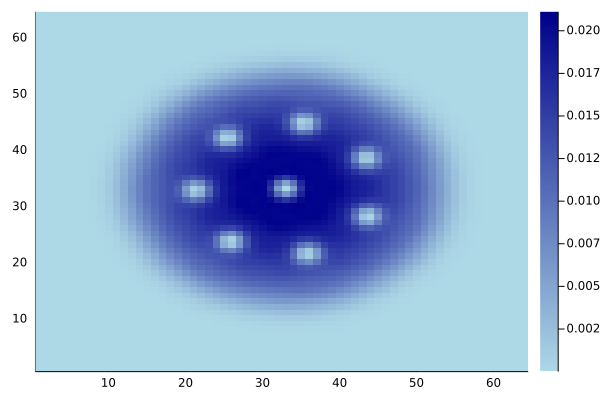

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)